# EEG data analysis results with correct binning

In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [7]:
# util function to read file
def read_file(filename):
    with open(filename, 'rb') as file:
        loaded_file = pickle.load(file)
    return loaded_file

# plot
def plot_map(l_array, r_array, title):
    fig, ax = plt.subplots(nrows = 2, ncols =2, figsize=(16,10))

    l = ax[0].imshow(np.mean(l_array, axis=0).T, origin='lower', cmap='plasma')
    r = ax[1].imshow(np.mean(r_array, axis=0).T, origin='lower', cmap='cividis')

    l_cbar = ax[0].figure.colorbar(l, label='bits', location = 'bottom', pad = 0.1)
    r_cbar = ax[1].figure.colorbar(r, label='bits', location = 'bottom', pad = 0.1)

    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-2, 2))  

    l_cbar.ax.xaxis.set_major_formatter(formatter)
    r_cbar.ax.xaxis.set_major_formatter(formatter)   

    ax[0].set_xlim(0,290)
    ax[1].set_xlim(0,290)

    ax[0].set_xlabel('peri-stimulus time (ms)')
    ax[1].set_xlabel('peri-stimulus time (ms)')

    ax[0].set_ylabel('delay (ms)')
    ax[1].set_ylabel('delay (ms)')

    ax[0].set_title('Left ' + title)
    ax[1].set_title('Right ' + title)

    plt.show()

def plot_map4(l_array, r_array, title):
    fig, ax = plt.subplots(nrows = 2, ncols =2, figsize=(16,10))

    l = ax[0][0].imshow(np.mean(l_array, axis=0).T, origin='lower', cmap='plasma')
    r = ax[0][1].imshow(np.mean(r_array, axis=0).T, origin='lower', cmap='cividis')

    l_m = np.mean(l_array, axis = (0,2))
    r_m = np.mean(r_array, axis = (0,2))
    
    l_s = np.std(l_array, axis=(0,2))/np.sqrt(15+120)
    r_s = np.std(r_array, axis=(0,2))/np.sqrt(15+120)

    tmax = l_m.shape[0]

    t = np.arange(tmax)

    ax[1][0].grid(alpha=0.3)
    ax[1][0].plot(l_m, label='mean', color='C1')
    ax[1][0].set_title('Left ' + title + ' averaged over delays')
    ax[1][0].fill_between(t, l_m-l_s, l_m+l_s, alpha=0.4, label = 'mean error', color='C1')
    ax[1][0].legend()
    ax[1][0].set_xlabel('peri-stimulus time (ms)')
    ax[1][0].set_ylabel('bits')

    ax[1][1].grid(alpha=0.3)
    ax[1][1].plot(r_m, label='mean')
    ax[1][1].set_title('Right ' + title + ' averaged over delays')
    ax[1][1].fill_between(t, r_m-r_s, r_m+r_s, alpha=0.4, label = 'mean error', color='C0')
    ax[1][1].legend()
    ax[1][1].set_xlabel('peri-stimulus time (ms)')
    ax[1][1].set_ylabel('bits')

    l_cbar = ax[0][0].figure.colorbar(l, label='bits', location = 'bottom', pad = 0.15)
    r_cbar = ax[0][1].figure.colorbar(r, label='bits', location = 'bottom', pad = 0.15)

    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-2, 2))  

    l_cbar.ax.xaxis.set_major_formatter(formatter)
    r_cbar.ax.xaxis.set_major_formatter(formatter)   

    ax[1][0].yaxis.set_major_formatter(formatter)
    ax[1][1].yaxis.set_major_formatter(formatter)

    ax[0][0].set_xlim(0,290)
    ax[0][1].set_xlim(0,290)

    ax[0][0].set_xlabel('peri-stimulus time (ms)')
    ax[0][1].set_xlabel('peri-stimulus time (ms)')

    ax[0][0].set_ylabel('delay (ms)')
    ax[0][1].set_ylabel('delay (ms)')

    ax[0][0].set_title('Left ' + title)
    ax[0][1].set_title('Right ' + title)

    plt.show()

In [3]:
# files
left_LR_file = 'eeg_left_LR_values.pkl'
left_RL_file = 'eeg_left_RL_values.pkl'

right_LR_file = 'eeg_right_LR_values.pkl'
right_RL_file = 'eeg_right_RL_values.pkl'

# load values
left_LR = np.array(read_file(left_LR_file))
left_RL = np.array(read_file(left_RL_file))

right_LR = np.array(read_file(right_LR_file))
right_RL = np.array(read_file(right_RL_file))

# LR

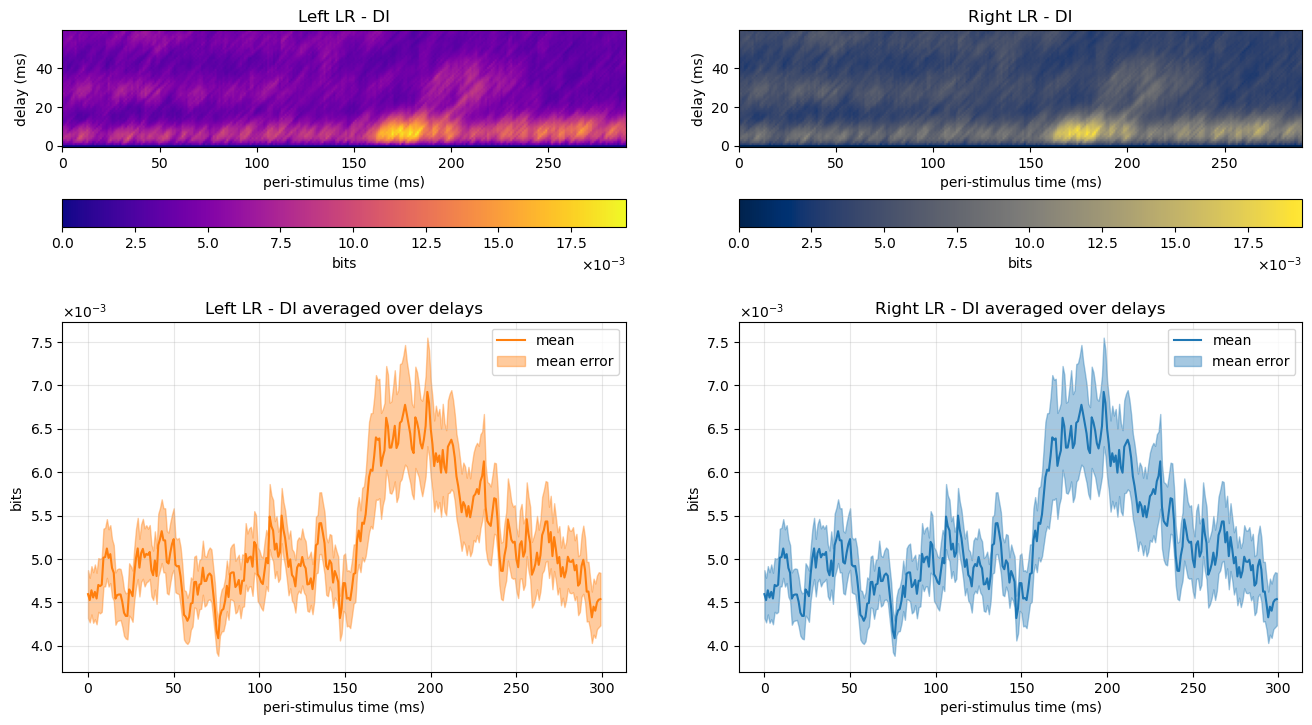

In [8]:
plot_map4(left_LR[0, :, :], right_LR[0, :, :], 'LR - DI')

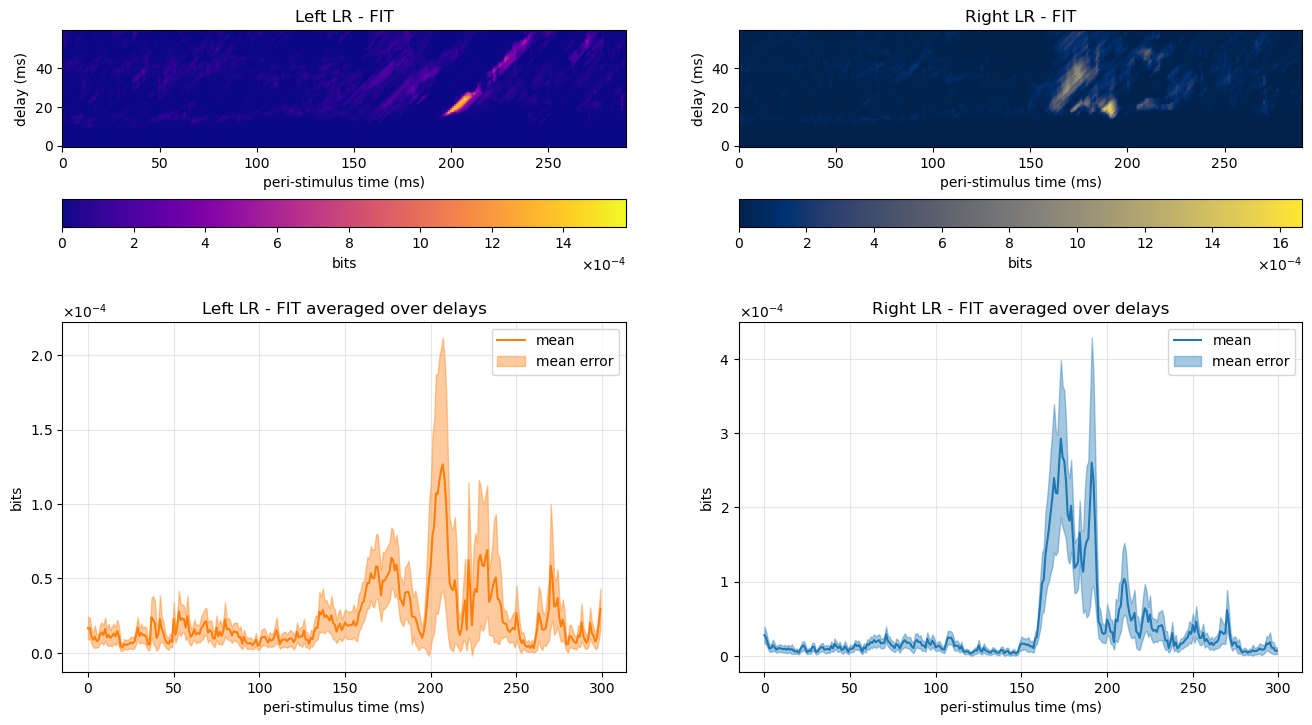

In [9]:
plot_map4(left_LR[1, :, :], right_LR[1, :, :], 'LR - FIT')

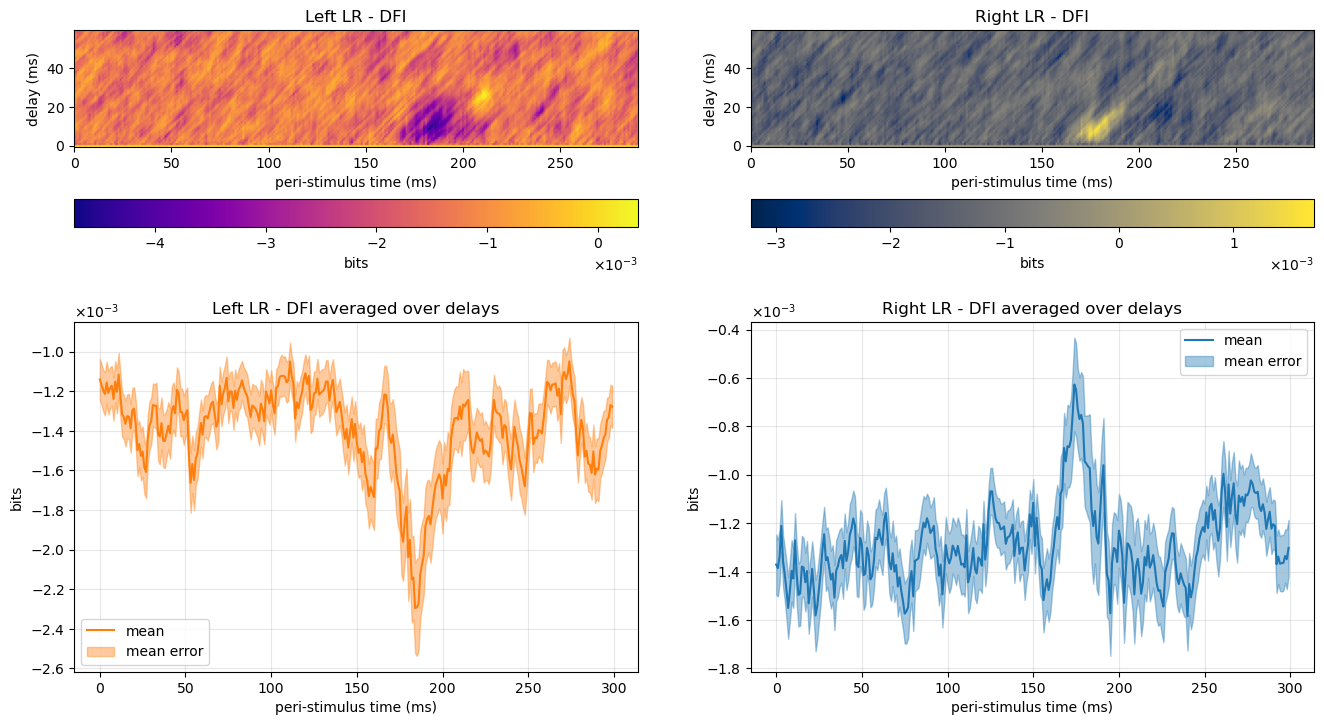

In [10]:
plot_map4(left_LR[2, :, :], right_LR[2, :, :], 'LR - DFI')

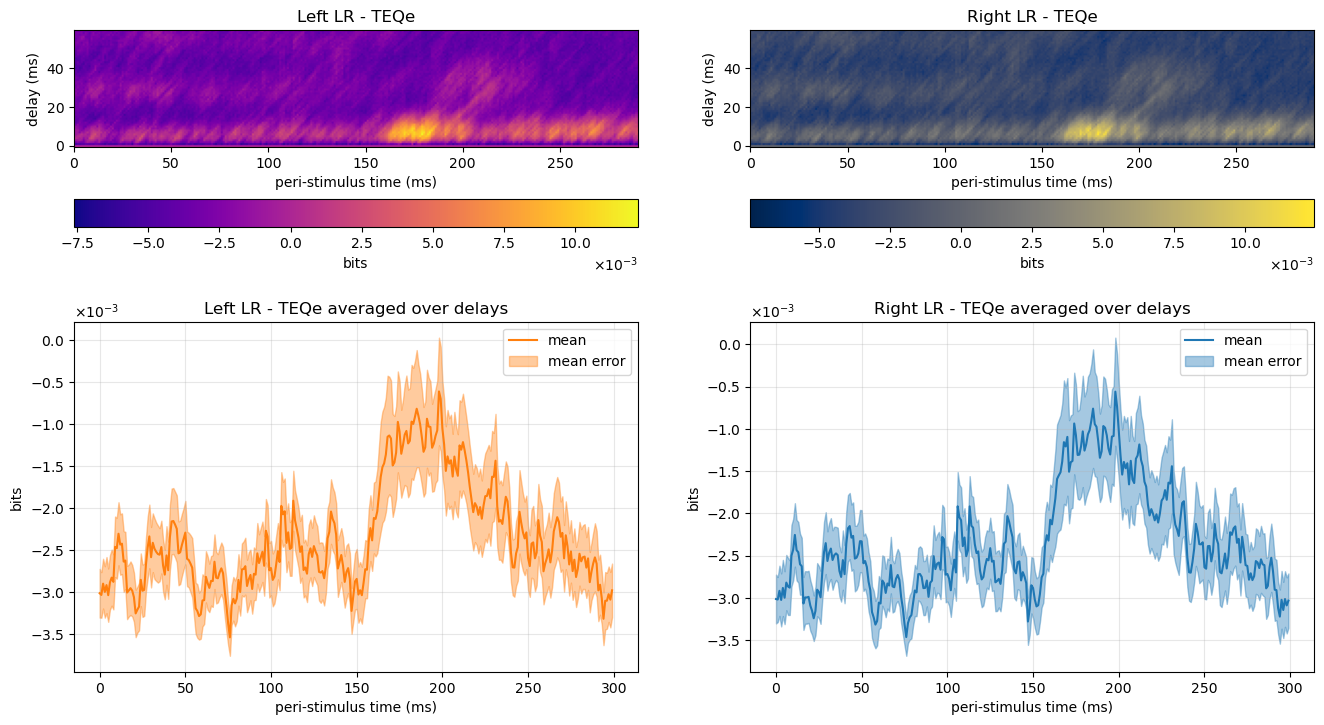

In [11]:
plot_map4(left_LR[3, :, :], right_LR[3, :, :], 'LR - TEQe')

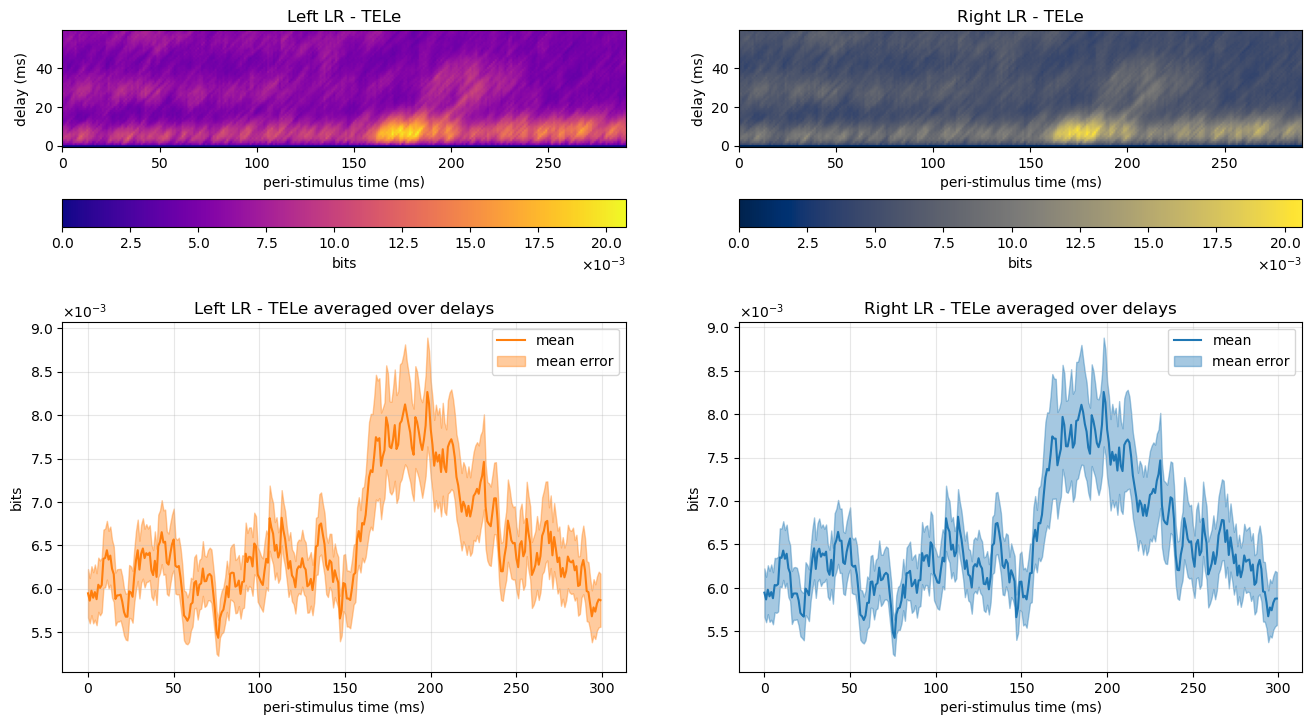

In [12]:
plot_map4(left_LR[4, :, :], right_LR[4, :, :], 'LR - TELe')

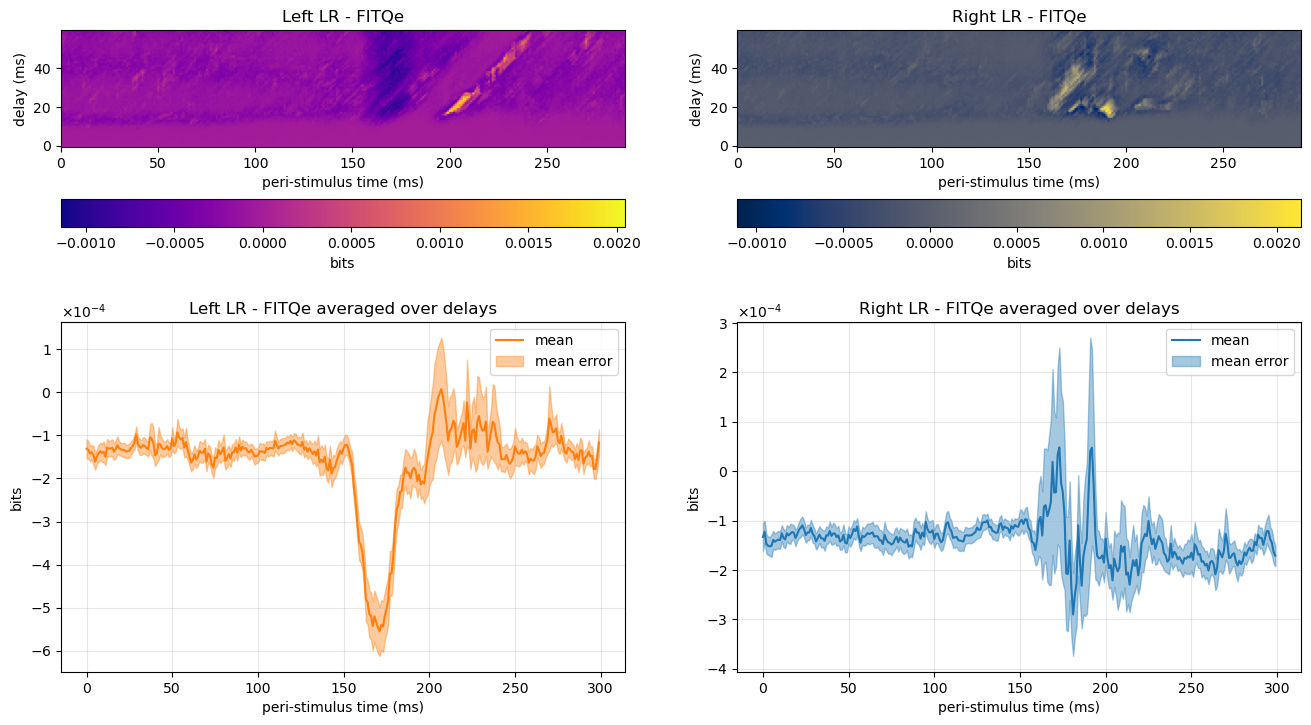

In [13]:
plot_map4(left_LR[5, :, :], right_LR[5, :, :], 'LR - FITQe')

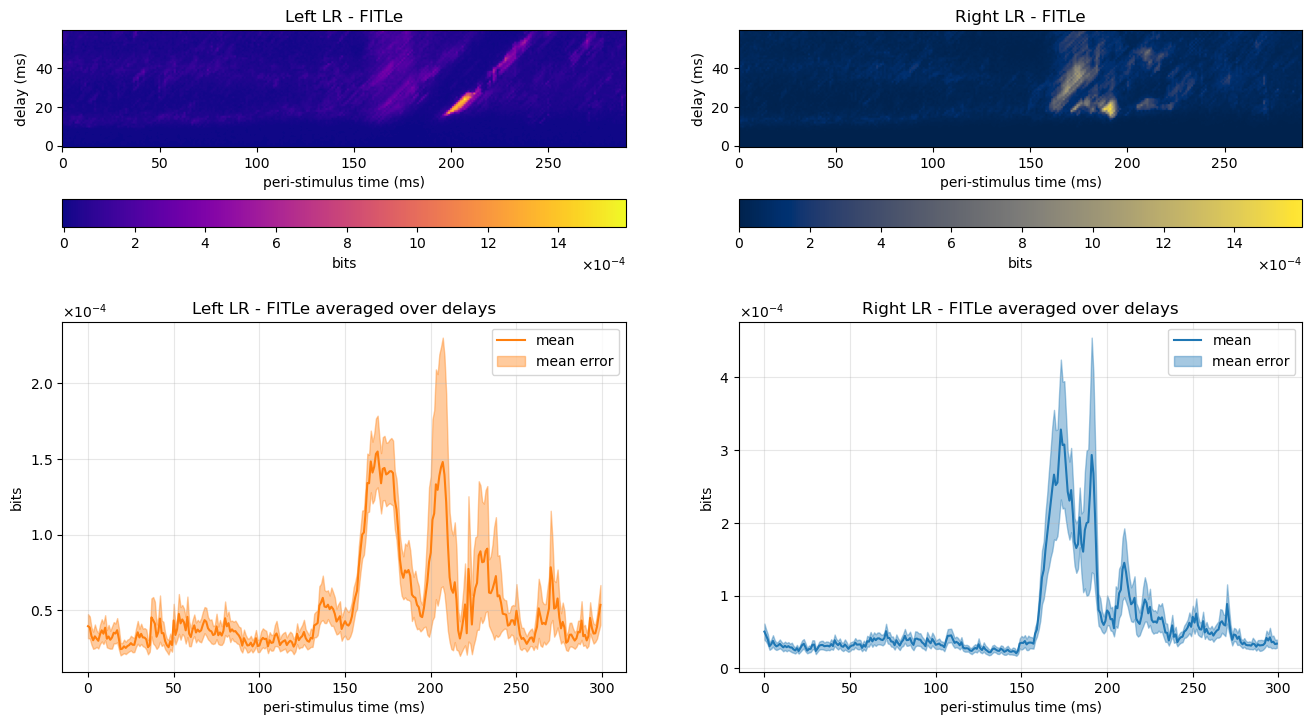

In [14]:
plot_map4(left_LR[6, :, :], right_LR[6, :, :], 'LR - FITLe')

# RL

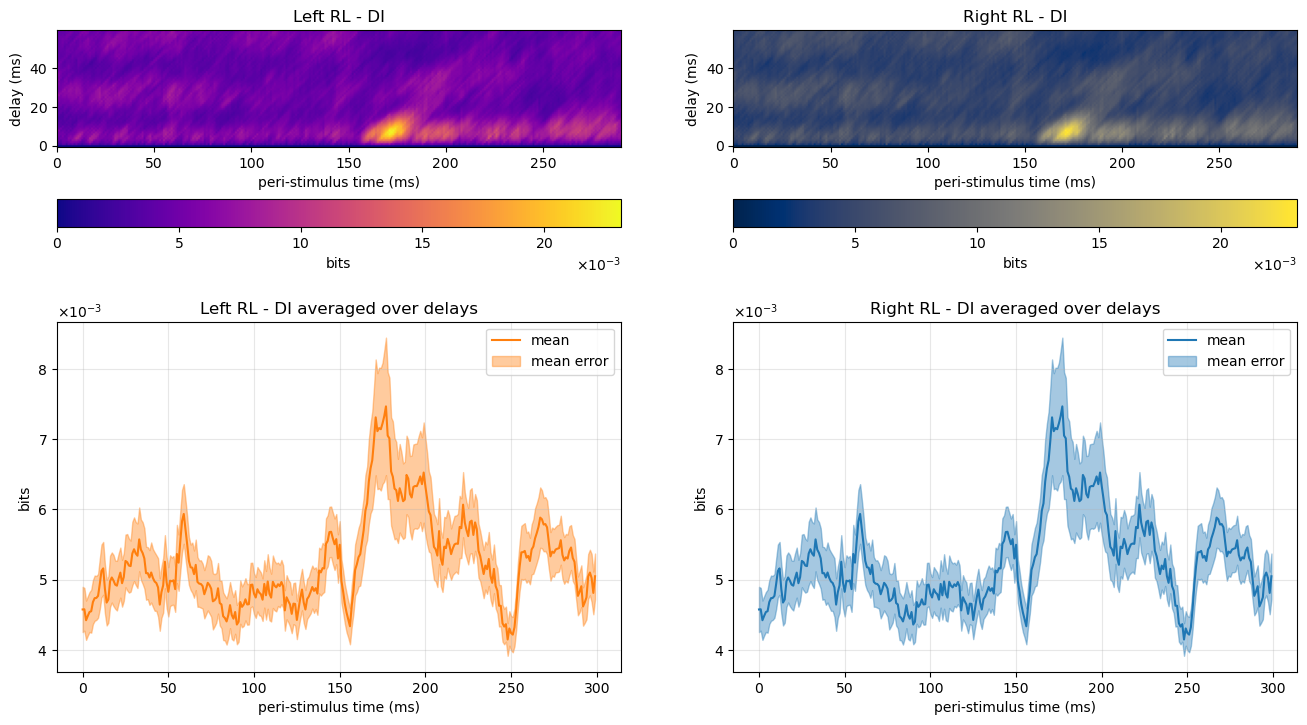

In [15]:
plot_map4(left_RL[0, :, :], right_RL[0, :, :], 'RL - DI')

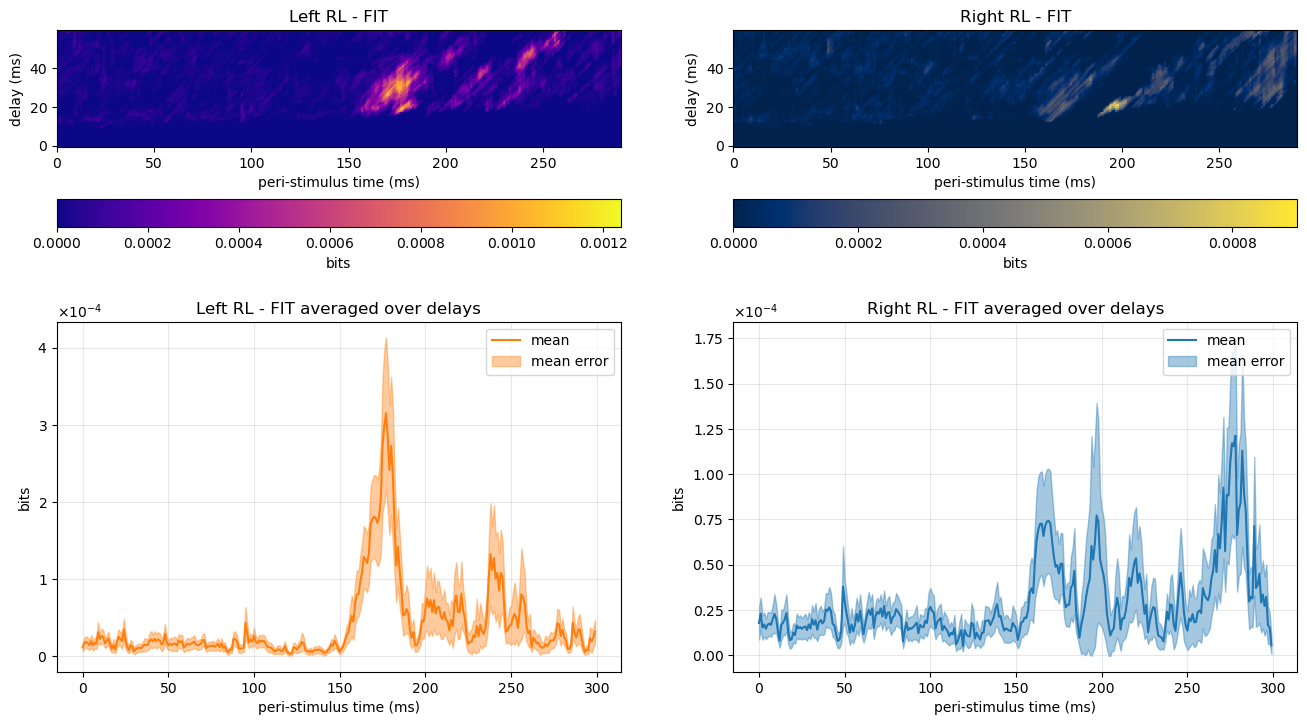

In [16]:
plot_map4(left_RL[1, :, :], right_RL[1, :, :], 'RL - FIT')

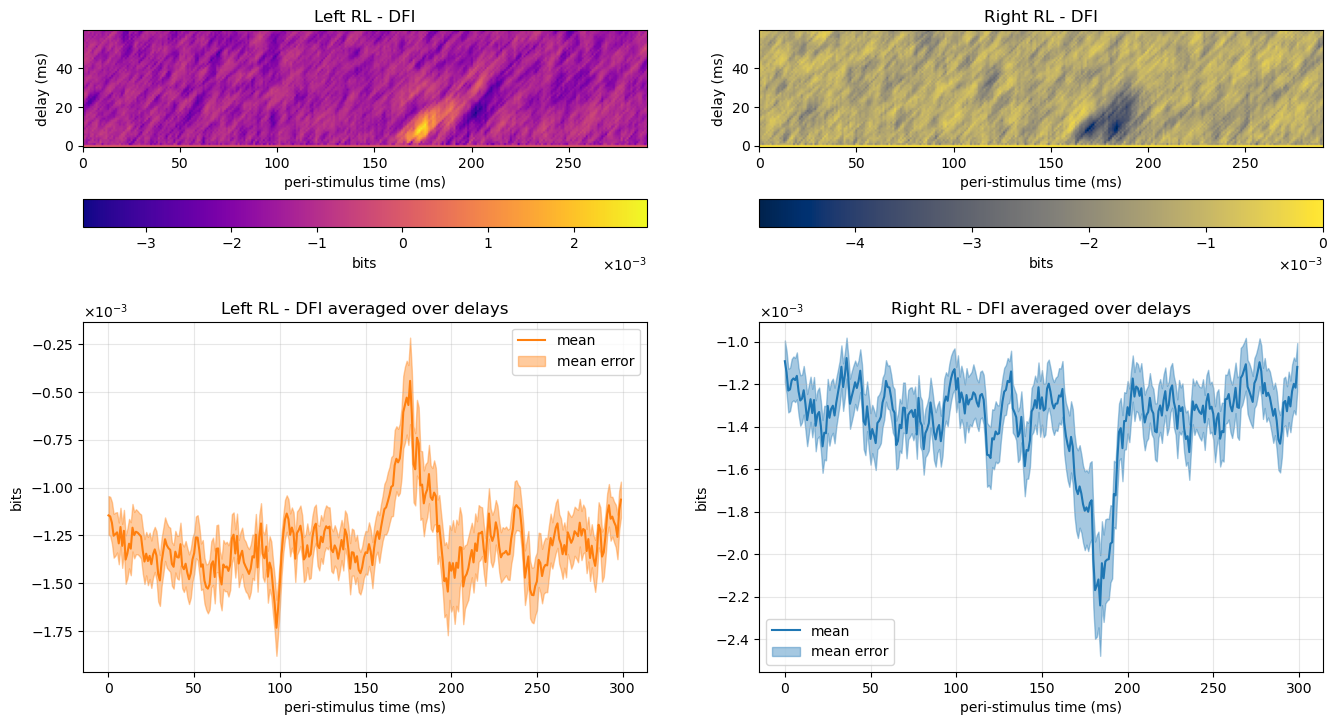

In [17]:
plot_map4(left_RL[2, :, :], right_RL[2, :, :], 'RL - DFI')

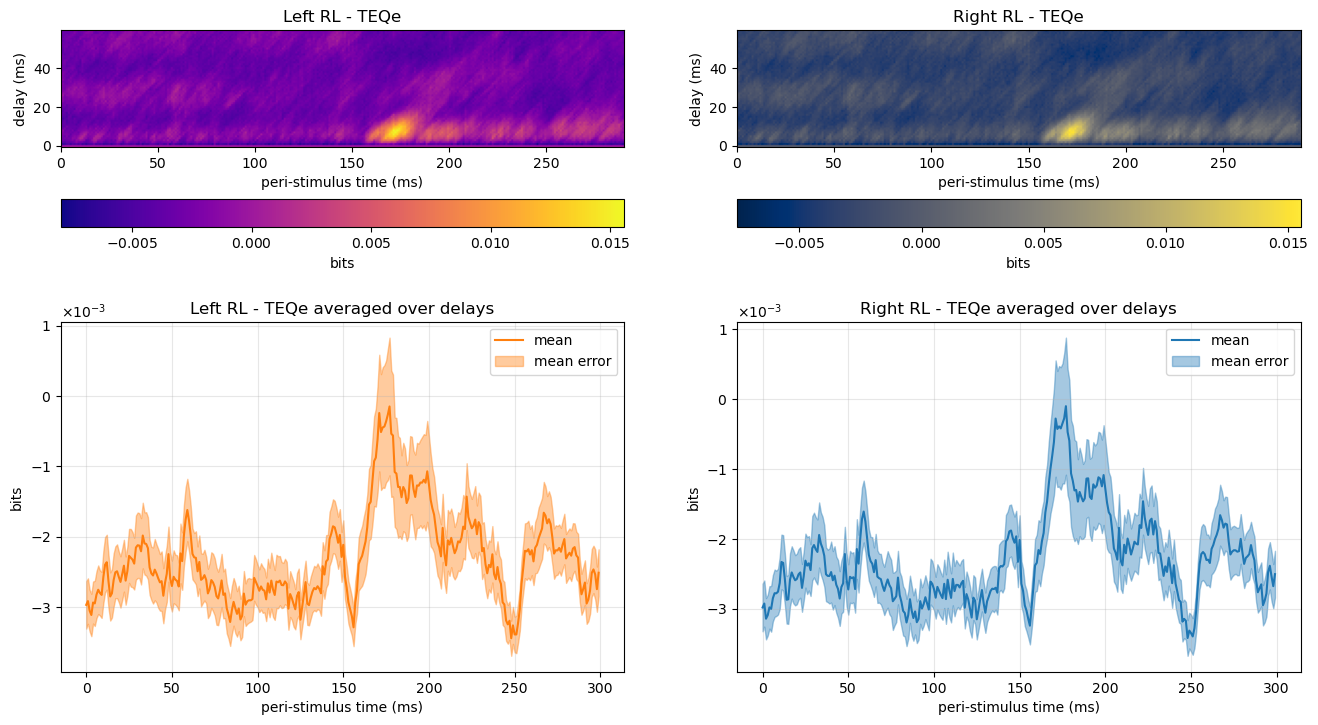

In [18]:
plot_map4(left_RL[3, :, :], right_RL[3, :, :], 'RL - TEQe')

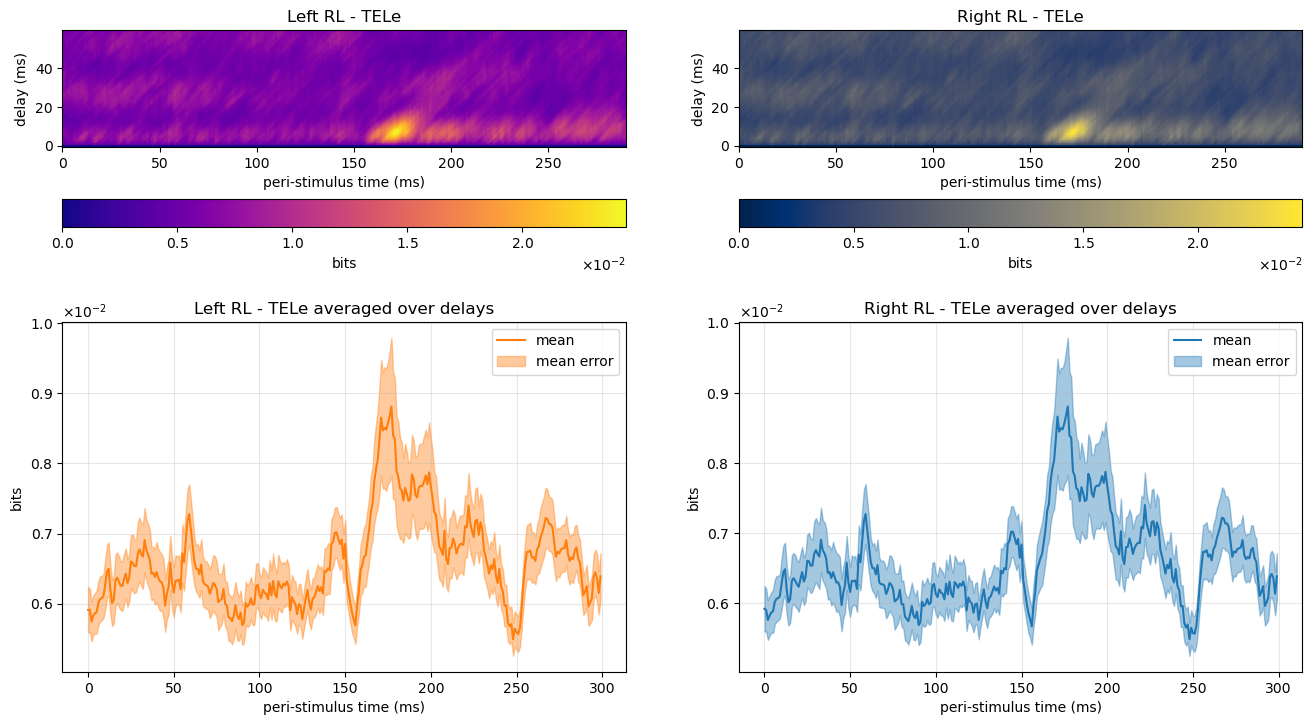

In [19]:
plot_map4(left_RL[4, :, :], right_RL[4, :, :], 'RL - TELe')

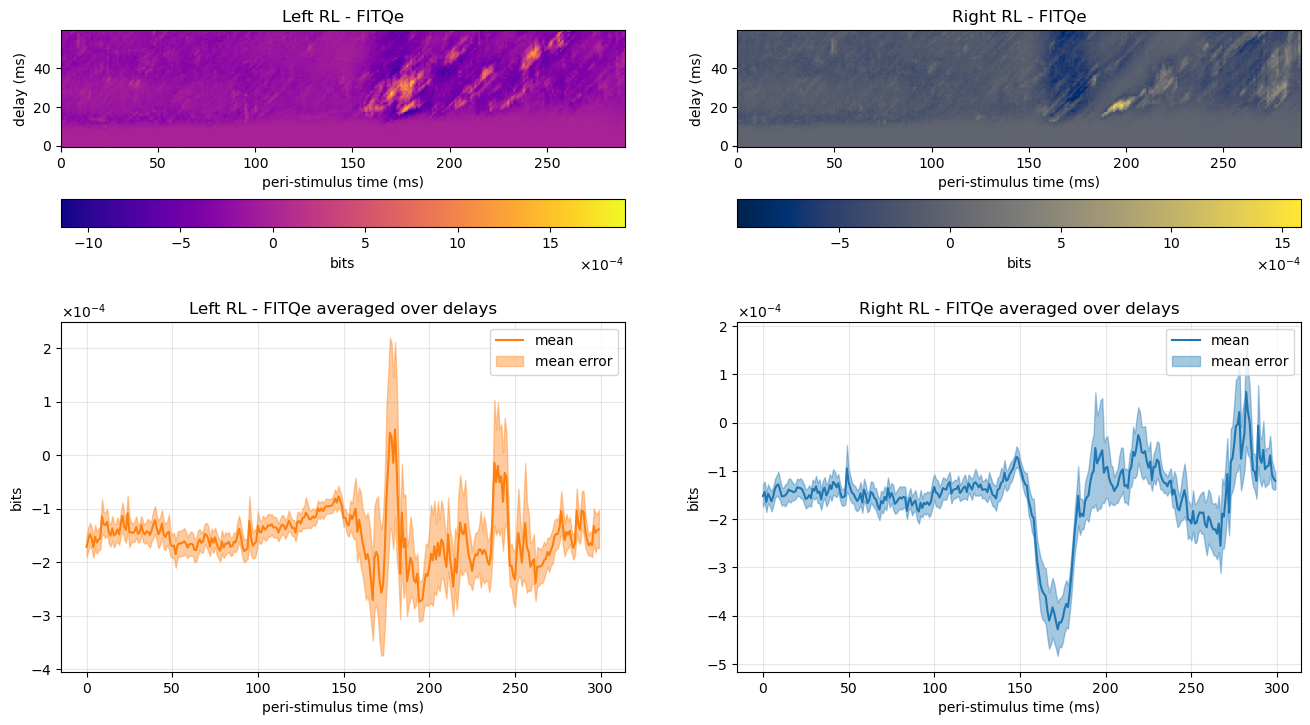

In [20]:
plot_map4(left_RL[5, :, :], right_RL[5, :, :], 'RL - FITQe')

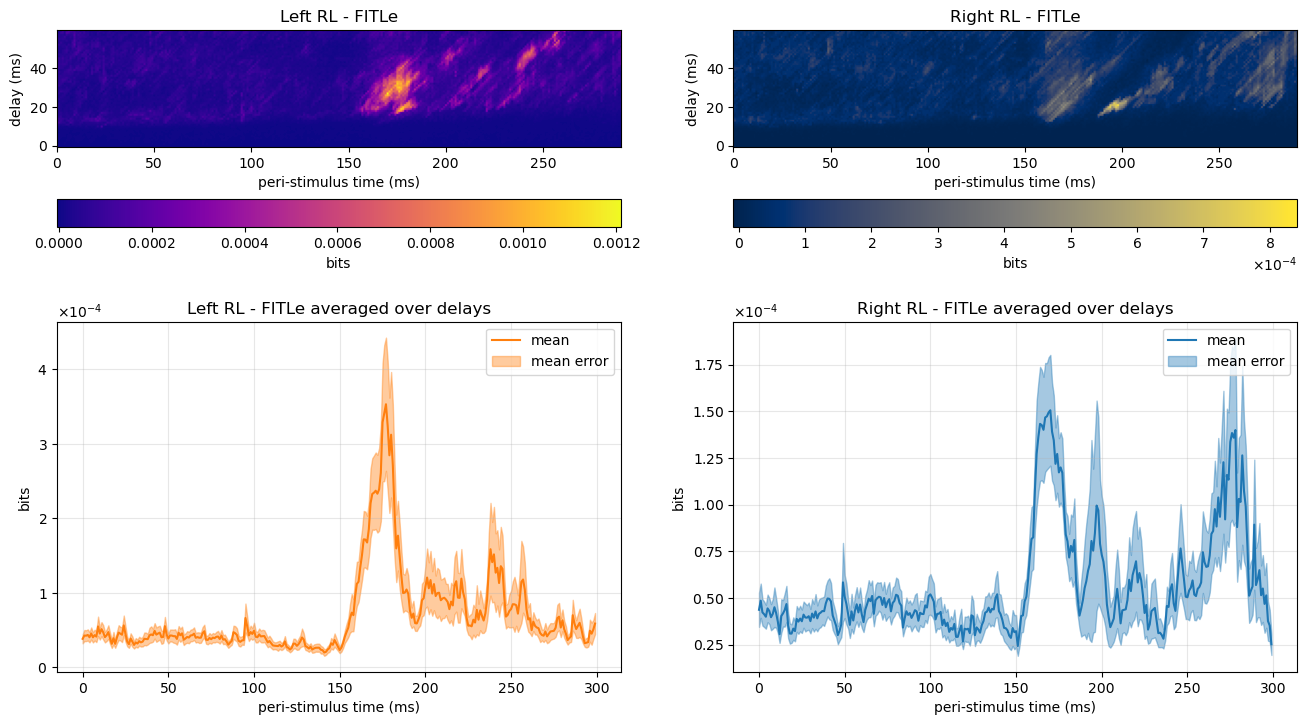

In [21]:
plot_map4(left_RL[6, :, :], right_RL[6, :, :], 'RL - FITLe')